In [2]:
%matplotlib inline
from importlib import reload

from scipy import signal, stats, spatial, ndimage

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')

from TreeMazeAnalyses2.Analyses import spatial_functions as spatial_funcs
import TreeMazeAnalyses2.Analyses.open_field_functions as of_funcs
import TreeMazeAnalyses2.Analyses.tree_maze_functions as tmf

from TreeMazeAnalyses2.Analyses import subject_info as si
si = reload(si)

from ipywidgets import interact, fixed
import ipywidgets as widgets

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from TreeMazeAnalyses2.Analyses import subject_info as si

si = reload(si)
session = 'Li_T3g_070618'
subject = session.split('_')[0]
session_info = si.SubjectSessionInfo(subject, session)

## Test API for treemaze figure

In [4]:
from TreeMazeAnalyses2.Analyses import TreeMazeFunctions as TMF
o = TMF.getBehTrackData(session_info)

Loading Beh Tracking Data
Complete.


In [5]:
f_name = "/home/alexgonzalez/google-drive/TreeMazeProject/Figures/fig_1/TreeMazeLayout_plain.jpg"
img = plt.imread(f_name)

(-880.0, 880.0, -156.5, 1526.5)

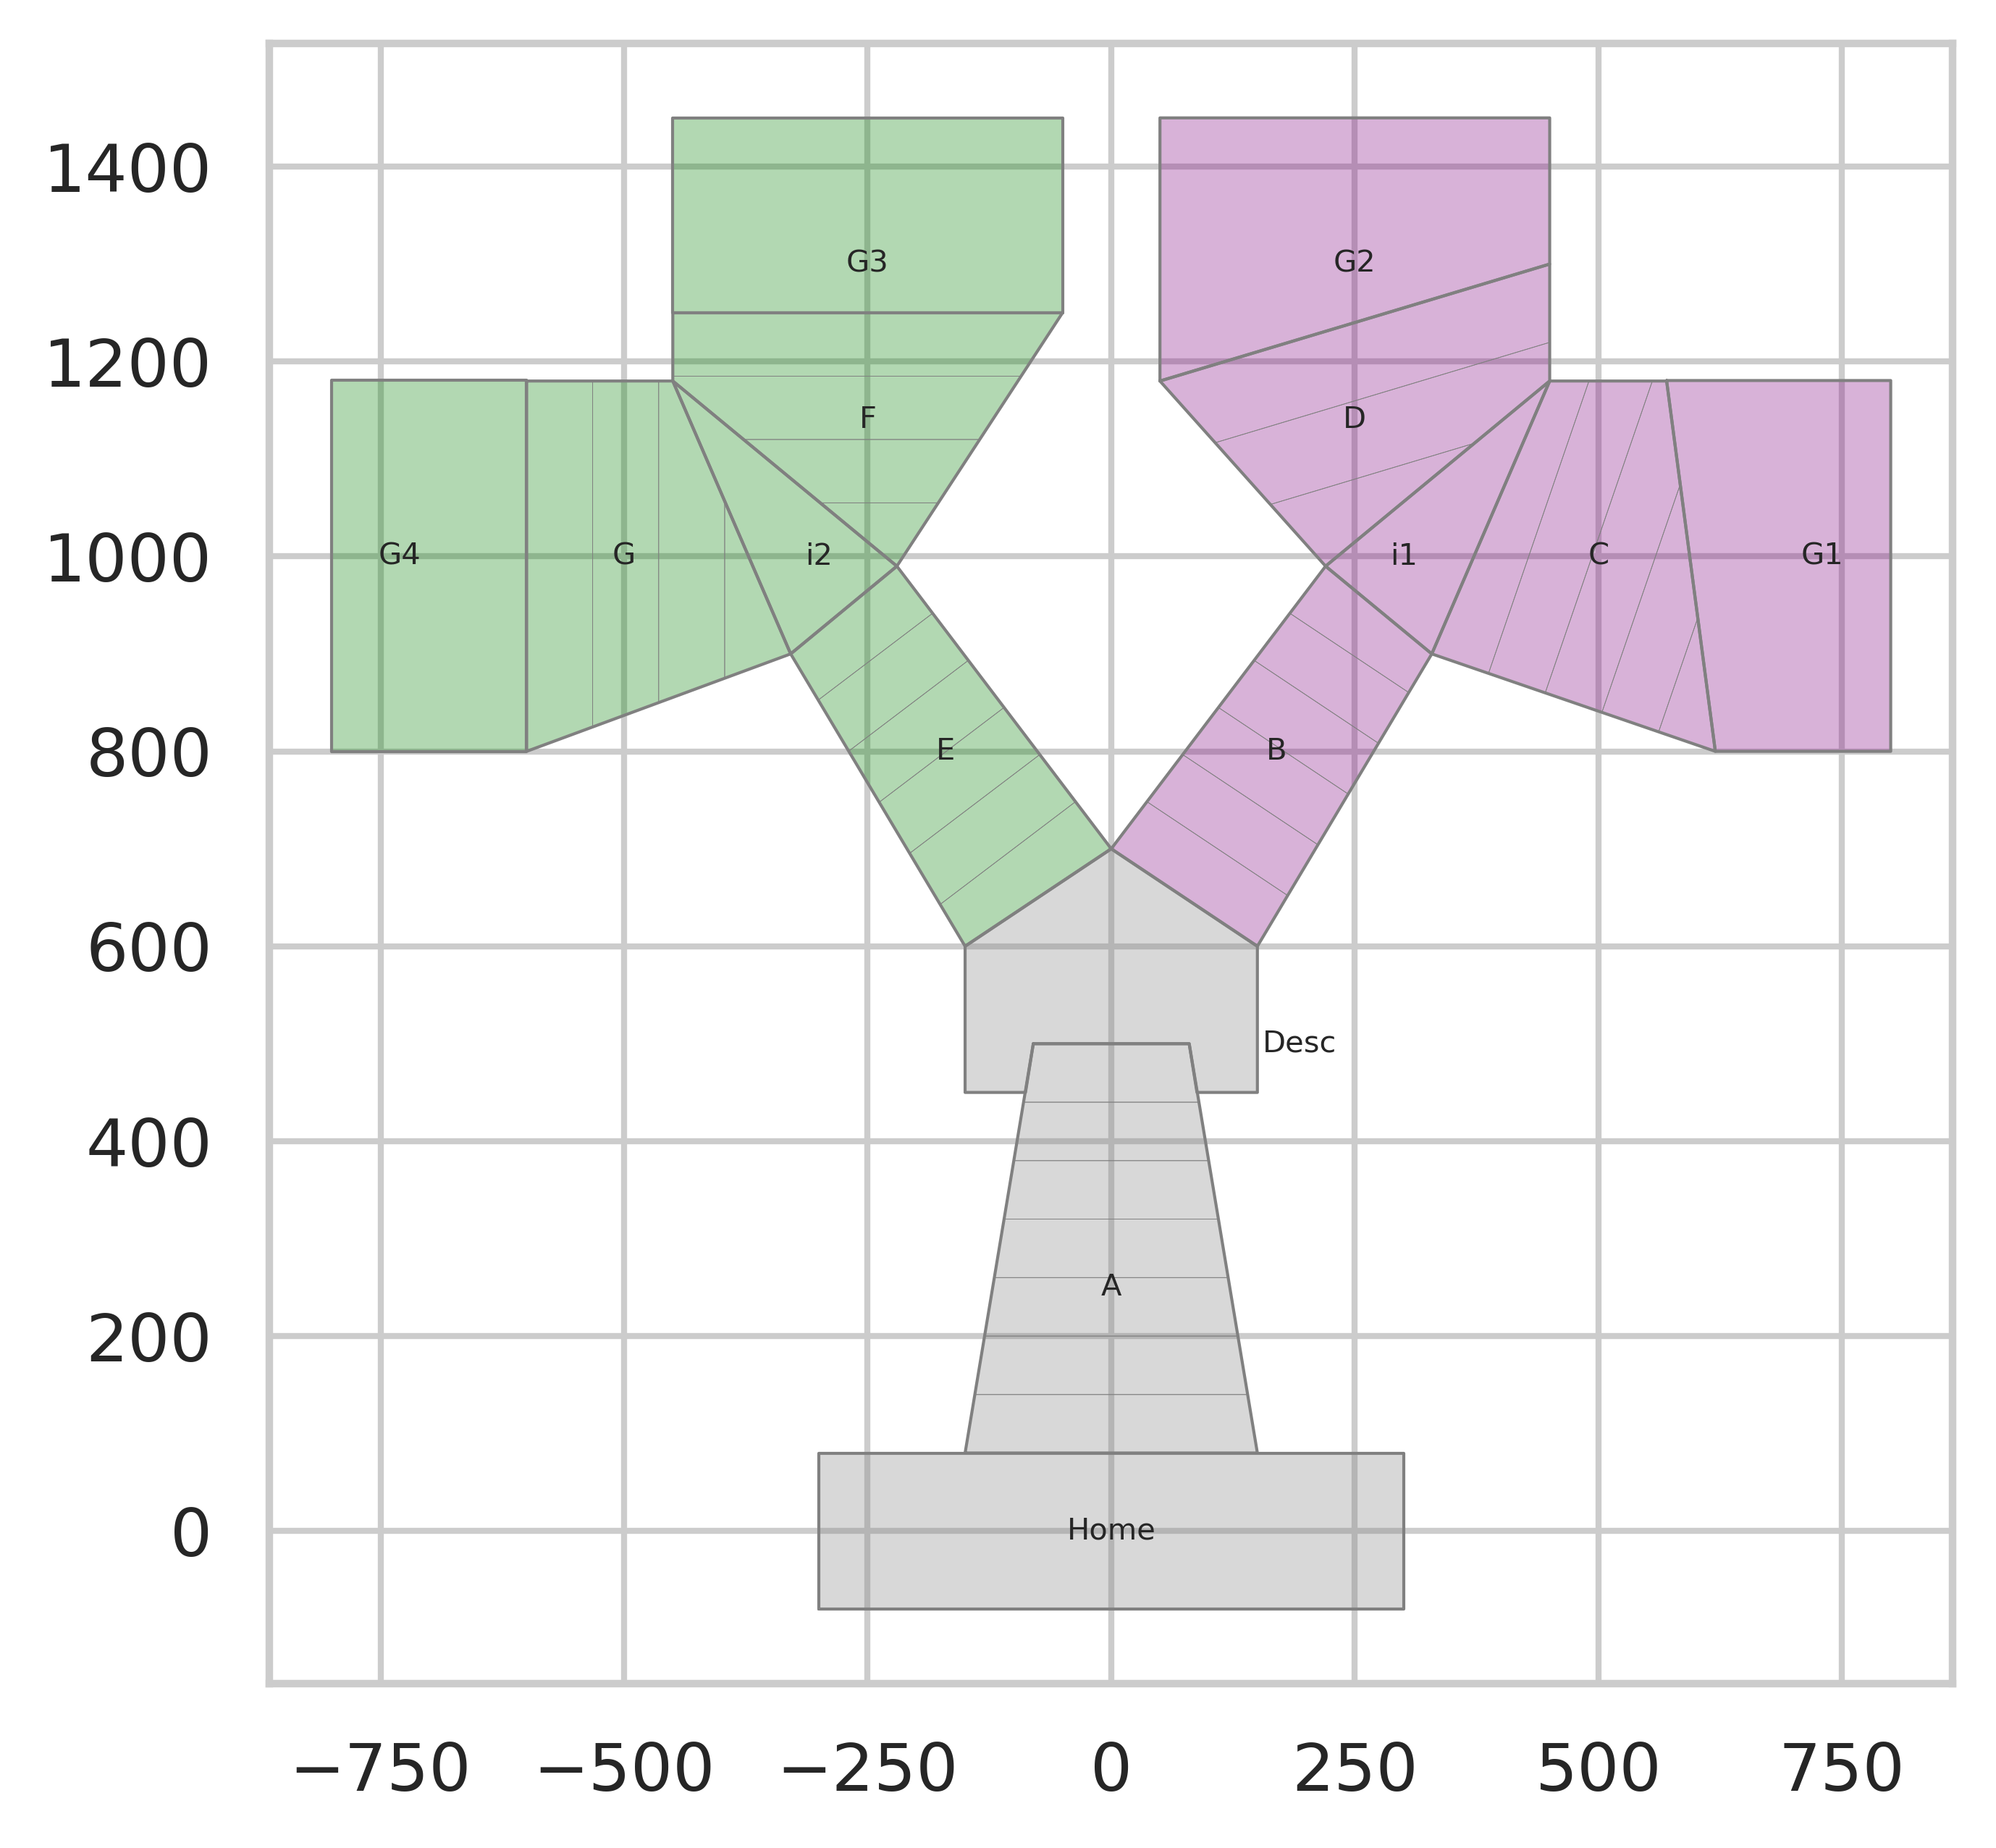

In [6]:
tmf = reload(tmf)
tree_maze = tmf.TreeMazeZones()
f, ax = plt.subplots(figsize=(5,5), dpi=600)

ax = tree_maze.plot_maze(seg_color='cue', zone_labels=True, font_size=5, axis=ax, lw=0.5, sub_segs='all', sub_seg_lw=0.1, sub_seg_color='None')

ax.axis('on')
#ax.imshow(img)

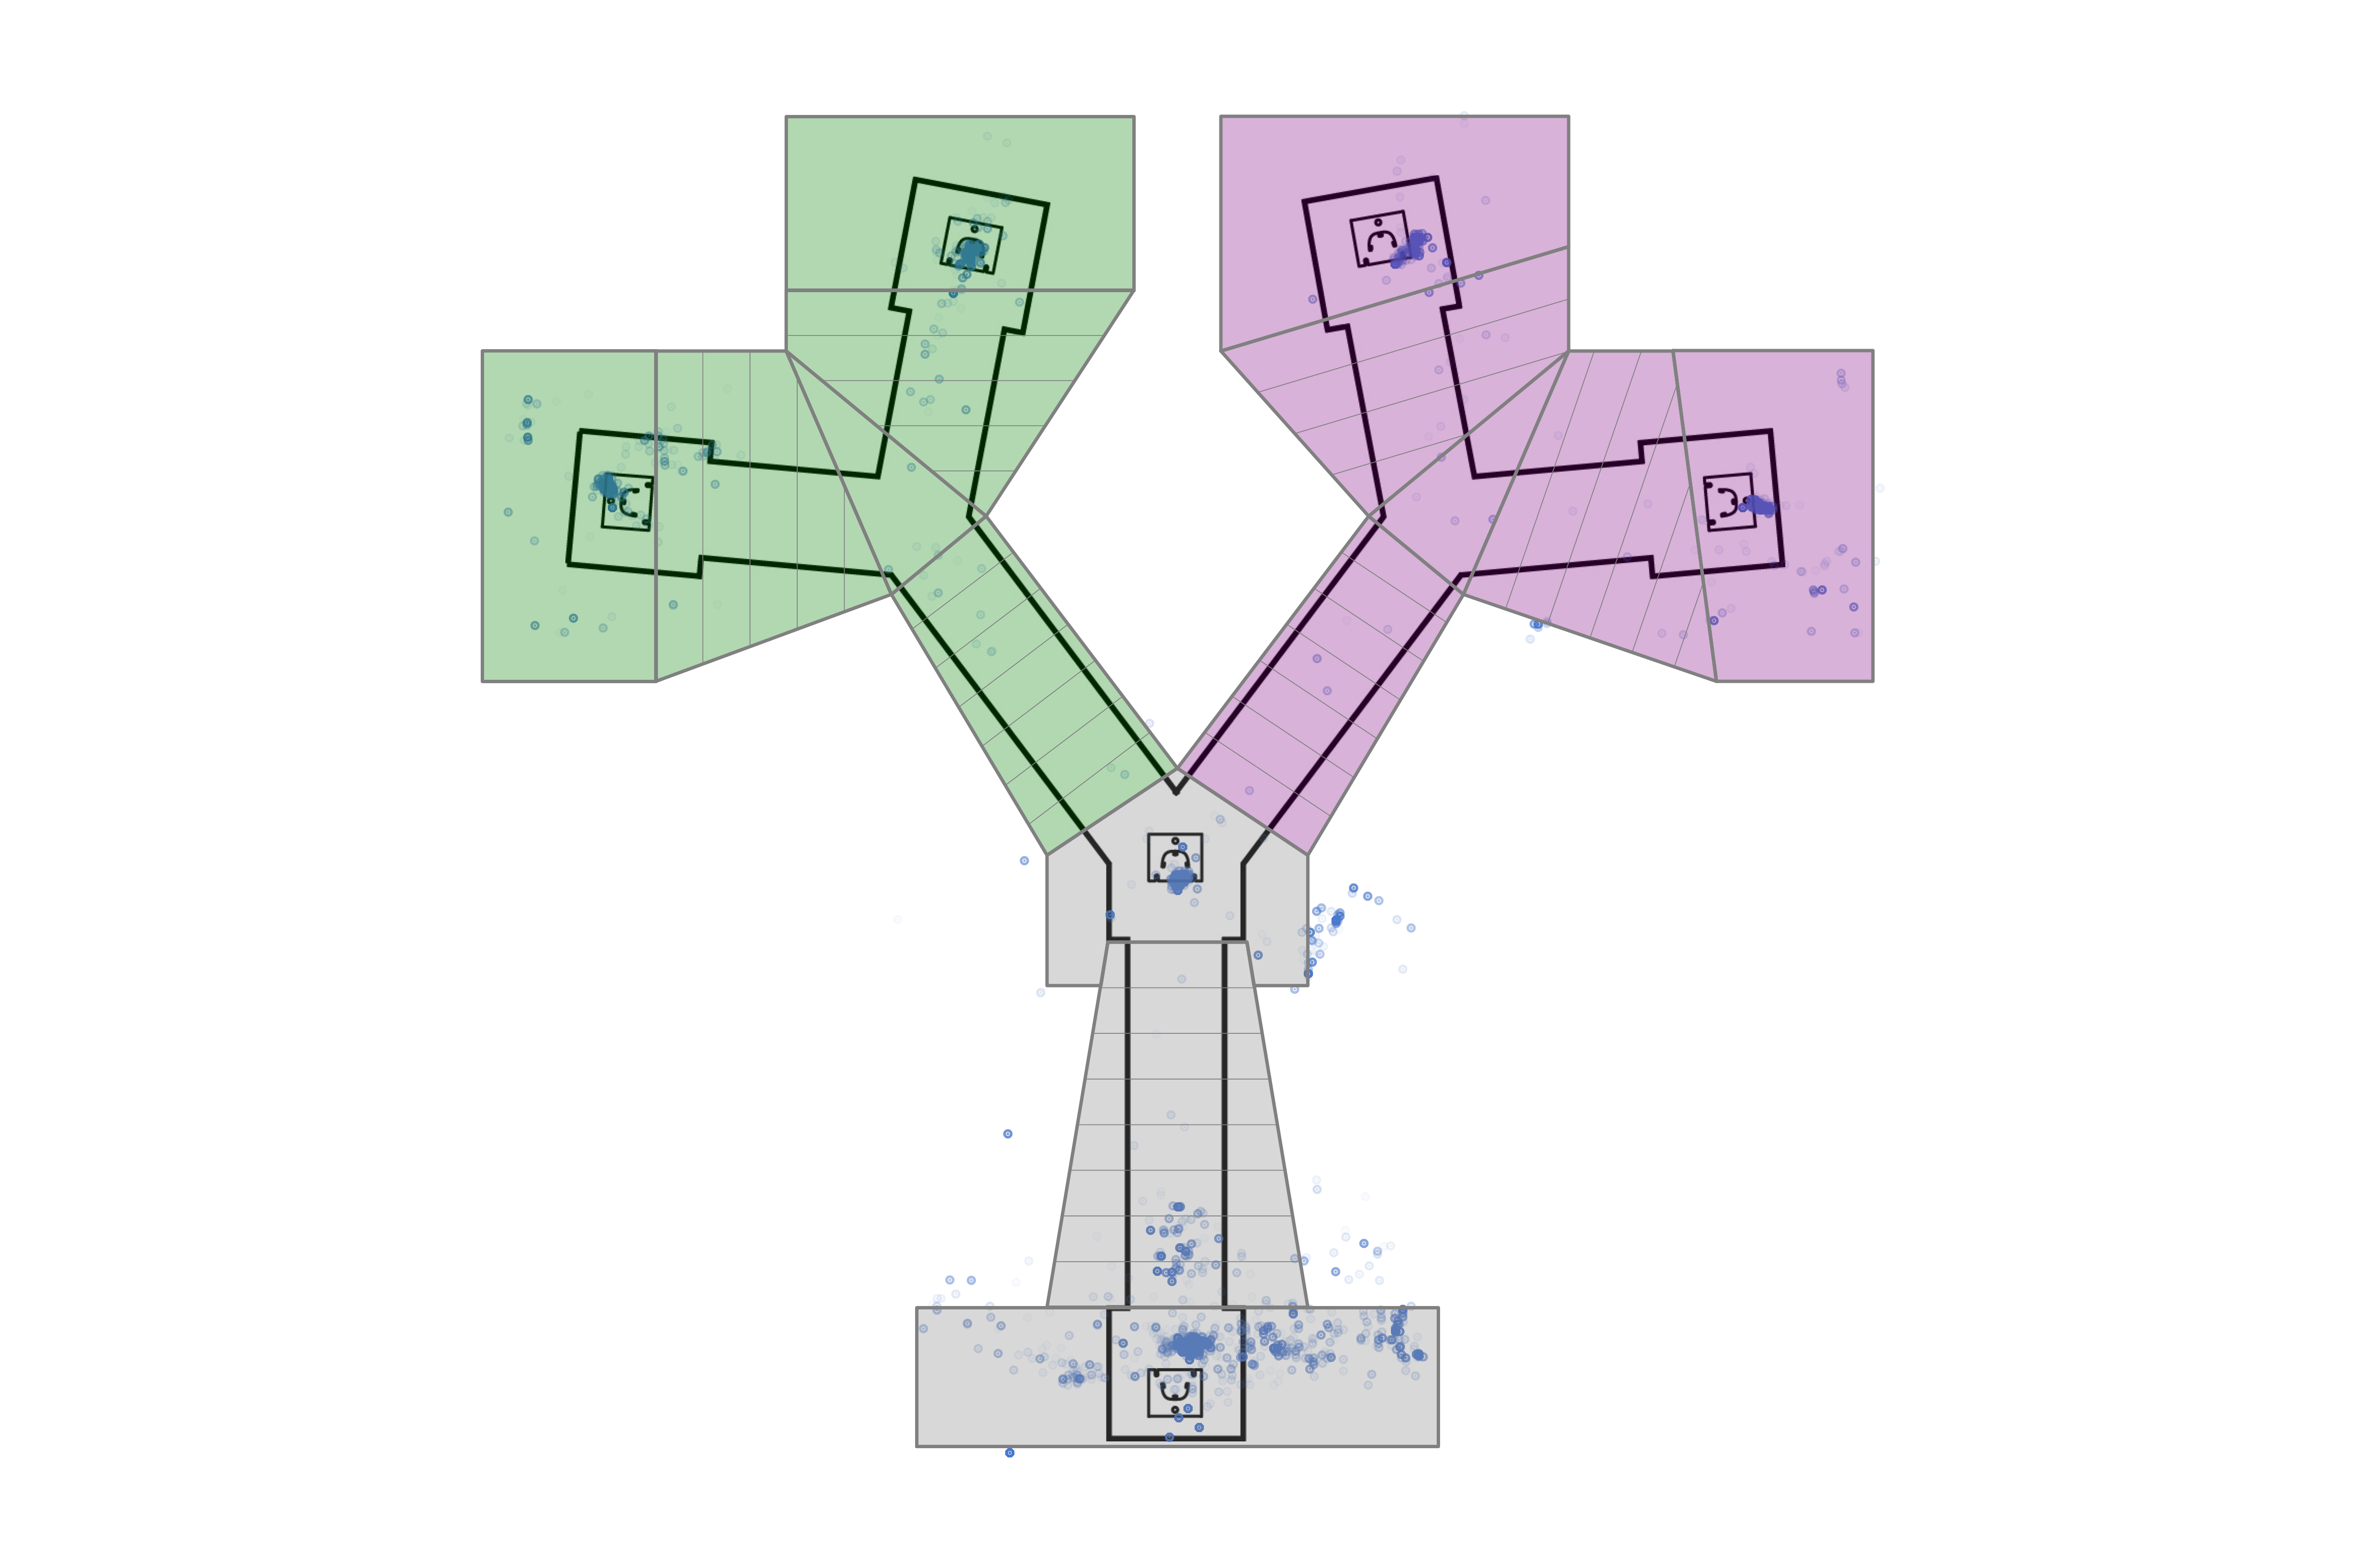

In [7]:
tmf = reload(tmf)
tree_maze = tmf.TreeMazeZones(sub_seg_length=50)

f, ax = plt.subplots( dpi=1000)

ax_pos = ax.get_position()
y0_mod = 0.04
h_mod = -0.105
x0_mod =-0.002#-0.025#-0.0009
w_mod = 0#x0_mod+0.075

ax_pos = [ax_pos.x0+x0_mod, ax_pos.y0+y0_mod, ax_pos.width+w_mod, ax_pos.height+h_mod]
newax = f.add_axes(ax_pos, anchor='C', zorder=-1)
newax.imshow(img)
#newax.set_xlim([-0,1245])
newax.axis('off')
#newax.patch.set_alpha(0.0)#
#newax.set_aspect(0.99)
#

ax = tree_maze.plot_maze(seg_color='cue', zone_labels=False, seg_dir='out', font_size=5, axis=ax, lw=0.5, sub_segs='all', sub_seg_lw=0.1, sub_seg_color='None')
#ax.set_aspect(0.9)
#ax.axis('off')
s = o['Speed']
static =  s<5
ax.scatter(o['x'][static], o['y'][static], s=0.5, marker='.', alpha=0.05)

In [9]:
o.keys()

dict_keys(['EventDat', 'HeadingAng', 'InSeg', 'OutSeg', 'PosMat', 'PosZones', 'SegDirMat', 'SegDirSeq', 'Speed', 'step', 't', 'tB', 'tE', 'x', 'y'])

In [ ]:
2

In [203]:
np.sqrt(255**2-170**2)+329

519.0657780874822

In [208]:
def hip(a, b):
    return np.sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2 )


In [209]:
a = tree_maze.zones_coords['B'][1]
b = tree_maze.zones_coords['B'][2]
hip(a,b)

141.35416513141735